# Imports


In [0]:
import numpy as np
import pandas as pd
import random
import PIL
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split



import tensorflow as tf
import keras
from keras import models
from keras import layers
from keras import optimizers
from keras import regularizers
from keras import backend as K
K.set_image_dim_ordering('th')
K.set_image_data_format('channels_last')
from keras.applications import VGG16,VGG19
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.layers import Flatten,Dense
from keras.layers import Conv2D,Deconvolution2D,MaxPooling2D,UpSampling2D,Conv2DTranspose,GlobalAveragePooling2D


import glob
import errno
import os
import shutil
import zipfile

# **Colab File Handling**

## Google Drive

In [2]:
from google.colab import drive
while(True):
    try:
        drive.mount('/content/gdrive')
        break;
    except:
        continue

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


## Pydrive (To save files back to drive)

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
file_list = drive.ListFile({'q': "'root' in parents and trashed=false"}).GetList()
for file1 in file_list:
  print('title: %s, id: %s' % (file1['title'], file1['id']))


In [0]:
downloaded = drive.CreateFile({'id': '1NSiN-nfPrKFvSvlxfKUmX4dy07cv9RWq'})
file = downloaded.GetContentString()
print('Downloaded content "{}"'.format(len(file)))

text_file = open("", "w")
text_file.write(file)    
text_file.close()

## Kaggle (!pwd is /content) (Run this twice)

In [4]:
!pip install kaggle
!mkdir .kaggle
import json
token = {"username":"deepcyan","key":"e32b4e0b8f1e56642a50b96adcd3c664"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dum
Exp
Experiments.ipynb_
eriments.ipynb_

Experiments.ipynb_
p(token, file)
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json
!kaggle config set -n path -v /content
!chmod 600 /root/.kaggle/kaggle.json
!kaggle competitions download -c dogs-vs-cats

mkdir: cannot create directory ‘.kaggle’: File exists
- path is now set to: /content
  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 88.9MB/s]
 98% 266M/271M [00:02<00:00, 129MB/s]
100% 271M/271M [00:02<00:00, 107MB/s]
100% 541M/543M [00:05<00:00, 104MB/s] 
100% 543M/543M [00:05<00:00, 111MB/s]


## Unzipping the dataset

In [0]:
PATH = "competitions/dogs-vs-cats/"

In [6]:
with open(PATH + "test1.zip", "rb") as zipsrc:
    zfile = zipfile.ZipFile(zipsrc)
    for member in zfile.infolist():
        target_path = member.filename
        if target_path.endswith('/'):  # folder entry, create
            try:
                os.makedirs(PATH + target_path)
            except (OSError, IOError) as err:
               # Windows may complain if the folders already exist
               if err.errno != errno.EEXIST:
                    raise
            continue
        with open(PATH + target_path, 'wb') as outfile, zfile.open(member) as infile:
            shutil.copyfileobj(infile, outfile)
            
        if(np.random.rand(1) > 0.99):
            flist = glob.glob(PATH + "test1/*.jpg")
            print(len(flist))
            
with open(PATH + "train.zip", "rb") as zipsrc:
    zfile = zipfile.ZipFile(zipsrc)
    for member in zfile.infolist():
        target_path = member.filename
        if target_path.endswith('/'):  # folder entry, create
            try:
                os.makedirs(PATH + target_path)
            except (OSError, IOError) as err:
               # Windows may complain if the folders already exist
               if err.errno != errno.EEXIST:
                    raise
            continue
        with open(PATH + target_path, 'wb') as outfile, zfile.open(member) as infile:
            shutil.copyfileobj(infile, outfile)
            
        if(np.random.rand(1) > 0.999):
            flist = glob.glob(PATH + "train/*.jpg")
            print(len(flist))

12
37
212
217
240
293
404
476
526
568
598
1254
1482
1486
1655
1725
1856
1894
1953
2005
2135
2146
2222
2246
2279
2705
2756
2794
2797
2854
2893
2958
3111
3285
3449
3533
3588
3681
3703
3900
4054
4189
4232
4242
4252
4262
4286
4381
4538
4642
4675
4683
4768
4951
4990
5071
5220
5371
5434
5441
5676
5851
5861
5889
6310
6432
6671
6683
7007
7016
7064
7087
7098
7163
7178
7311
7357
7404
7446
7531
7608
7618
7635
7677
7807
7935
7975
8191
8263
8614
8670
8915
9275
9314
9419
9492
9671
9732
9761
9808
9835
9846
10045
10144
10226
10272
10330
10453
10505
10590
10610
10672
10737
10794
10918
10962
10992
11070
11300
11439
11484
11548
11805
12039
12221
12240
12256
12261
12316
255
723
3188
4781
5246
5601
5712
5864
6154
6317
7535
7863
8680
9254
10071
10628
11154
11576
13280
14115
14241
15003
15188
16360
18427
18442
19237
19412
20243
20858
23062
23824
24991


## Processing dataset

In [0]:
PATH = "competitions/dogs-vs-cats/"

In [0]:
PATH = PATH + "train/"
IMAGE_HEIGHT = 128
IMAGE_WIDTH = 128
COLOUR_CHANNELS = 3
BATCH_SIZE = 64
IMAGE_SIZE = (IMAGE_WIDTH,IMAGE_HEIGHT)
IMAGE_DIMS = (IMAGE_WIDTH,IMAGE_HEIGHT,COLOUR_CHANNELS)

In [0]:
filenames = os.listdir(PATH)
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append('1')
    else:
        categories.append('0')

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})


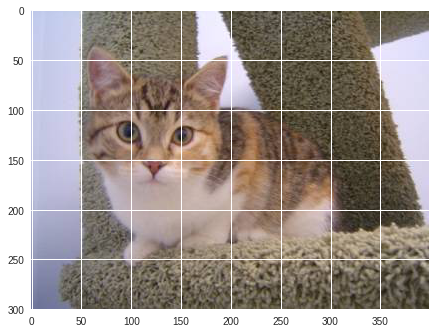

In [10]:
sample = 'cat.368.jpg'
image = load_img(PATH+sample)
plt.imshow(image)

In [0]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

In [12]:
train_df.head()

,category,filename
0,0,cat.5457.jpg
1,1,dog.6798.jpg
2,0,cat.2954.jpg
3,0,cat.7263.jpg
4,1,dog.6192.jpg


In [13]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    PATH, 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='binary',
    batch_size=BATCH_SIZE,
)

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    PATH, 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='binary',
    batch_size=BATCH_SIZE
)

TRAIN_SIZE = train_df.shape[0]
VALIDATE_SIZE = validate_df.shape[0]

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


## Building Classifier model and training

In [0]:
VGG = VGG16(include_top = False, input_shape=(IMAGE_DIMS))

Classifier = models.Sequential()
 
Classifier.add(VGG)
Classifier.add(layers.Flatten())
Classifier.add(layers.Dense(128, activation='relu'))
Classifier.add(layers.Dense(1, activation='sigmoid'))
 
Classifier.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1048704   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 15,763,521
Trainable params: 15,763,521
Non-trainable params: 0
_________________________________________________________________


In [0]:
Classifier.compile(loss='binary_crossentropy',optimizer=optimizers.adam(lr=1e-4),metrics=['acc'])

In [0]:
from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10019354776684199471
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 2462606917163657161
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 3266924100189863508
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11276946637
locality {
  bus_id: 1
  links {
  }
}
incarnation: 11625028094973571378
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
]


In [0]:
earlystop = EarlyStopping(patience=10)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
callbacks = [earlystop, learning_rate_reduction]

In [0]:
epochs=10
history = Classifier.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=VALIDATE_SIZE//BATCH_SIZE,
    steps_per_epoch=TRAIN_SIZE//BATCH_SIZE,
    callbacks=callbacks
)
Classifier.save_weights("model.h5")

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
312/312 [==============================] - 238s 764ms/step - loss: 0.3829 - acc: 0.8066 - val_loss: 0.2011 - val_acc: 0.9205
Epoch 2/10
312/312 [==============================] - 237s 760ms/step - loss: 0.1604 - acc: 0.9342 - val_loss: 0.1250 - val_acc: 0.9498
Epoch 3/10
312/312 [==============================] - 227s 728ms/step - loss: 0.1087 - acc: 0.9565 - val_loss: 0.1505 - val_acc: 0.9392
Epoch 4/10
312/312 [==============================] - 236s 756ms/step - loss: 0.0933 - acc: 0.9632 - val_loss: 0.0944 - val_acc: 0.9631
Epoch 5/10
312/312 [==============================] - 237s 760ms/step - loss: 0.0750 - acc: 0.9700 - val_loss: 0.1000 - val_acc: 0.9593
Epoch 6/10
312/312 [==============================] - 233s 748ms/step - loss: 0.0720 - acc: 0.9713 - val_loss: 0.0787 - val_acc: 0.9720
Epoch 7/10
312/312 [==============================] - 235s 752ms/step - loss: 0.0626 - acc: 0.9750 - val_loss: 0.0789 - val_acc: 0.9702


In [0]:
Classifier.save("aft10epoch.g5")

## Loading trained classifer model

In [14]:
cd gdrive/My\ Drive

/content/gdrive/My Drive


In [15]:
from keras.models import load_model
Classifier = load_model("a10.g5")

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [16]:
cd ../..

/content


## Training metrics for Classifier model


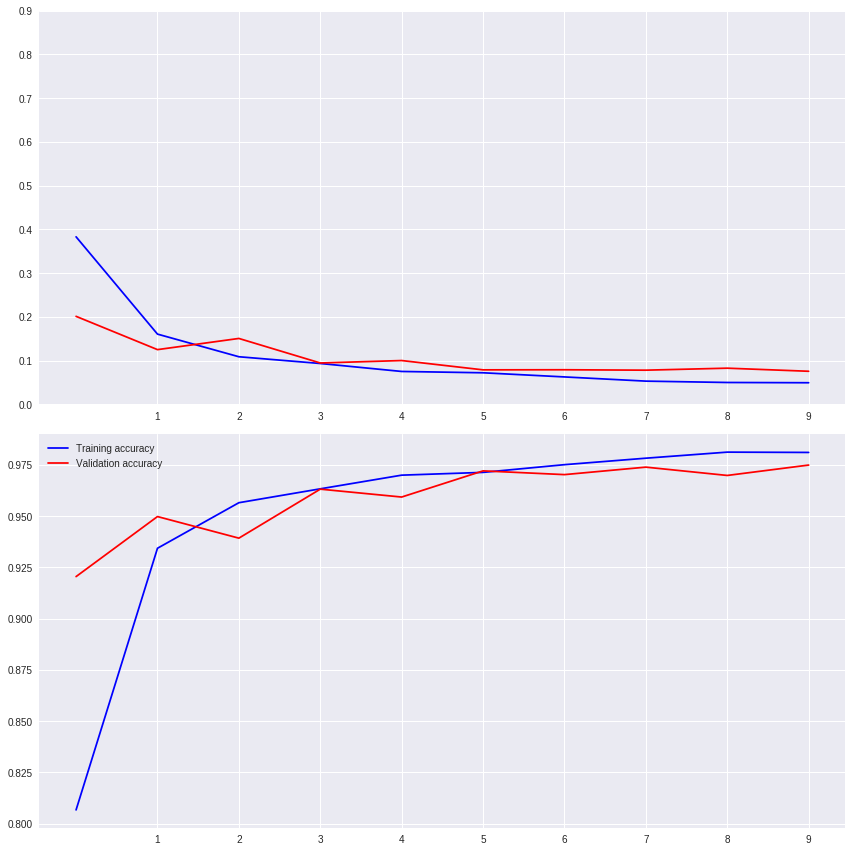

In [0]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['acc'], color='b', label="Training accuracy")
ax2.plot(history.history['val_acc'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

## Building and training Adversarial Model

### This one is unstable :(

In [0]:
'''
adversarialModel = models.Sequential()
adversarialModel.add(Conv2D(filters = 64, kernel_size= (3,3), input_shape=(IMAGE_DIMS), activation = 'relu'))
adversarialModel.add(MaxPooling2D((2,2), strides = 2))
adversarialModel.add(Conv2D(filters = 128, kernel_size= (3,3), activation = 'relu'))
adversarialModel.add(MaxPooling2D((2,2), strides = 2))
adversarialModel.add(Conv2D(filters = 256, kernel_size= (3,3), activation = 'relu'))
adversarialModel.add(MaxPooling2D((2,2), strides = 2))

adversarialModel.add(Conv2DTranspose(filters = 128, kernel_size = 2, activation = 'relu'))
adversarialModel.add(UpSampling2D(size = (2,2), data_format = 'channels_last', interpolation = 'bilinear'))
adversarialModel.add(Conv2DTranspose(filters = 64, kernel_size = 2, activation = 'relu'))
adversarialModel.add(UpSampling2D(size = (2,2), data_format = 'channels_last', interpolation = 'bilinear'))
adversarialModel.add(Conv2DTranspose(filters = 64, kernel_size = 2, activation = 'relu'))
adversarialModel.add(UpSampling2D(size = (2,2), data_format = 'channels_last', interpolation = 'bilinear'))
adversarialModel.add(Conv2DTranspose(filters = 3, kernel_size = 3, activation = 'relu', activity_regularizer=regularizers.l1(10e-5)))
'''

In [0]:
'''
adversarialModel = models.Sequential()
adversarialModel.add(Conv2D(filters = 64, kernel_size= (3,3), input_shape=(IMAGE_DIMS), activation = 'relu', padding = 'same'))
adversarialModel.add(MaxPooling2D((2,2), strides = 2))
adversarialModel.add(Conv2D(filters = 128, kernel_size= (3,3), activation = 'relu', padding = 'same'))
adversarialModel.add(MaxPooling2D((2,2), strides = 2))
adversarialModel.add(Conv2D(filters = 256, kernel_size= (3,3), activation = 'relu', padding = 'same'))
adversarialModel.add(UpSampling2D(size = (2,2), data_format = 'channels_last', interpolation = 'bilinear'))
adversarialModel.add(Conv2D(filters = 128, kernel_size= (3,3), activation = 'relu', padding = 'same'))
adversarialModel.add(UpSampling2D(size = (2,2), data_format = 'channels_last', interpolation = 'bilinear'))
adversarialModel.add(Conv2D(filters = 32, kernel_size= (3,3), activation = 'relu', padding = 'same'))
adversarialModel.add(Conv2D(filters = 3, kernel_size= (3,3), activation = 'tanh', padding = 'same',activity_regularizer=regularizers.l1(10e-5)))
'''

In [0]:
adversarialModel = models.Sequential()
adversarialModel.add(Conv2D(filters = 64, kernel_size= (3,3), input_shape=(IMAGE_DIMS), activation = 'relu', padding = 'same'))
adversarialModel.add(MaxPooling2D((2,2), strides = 2))
adversarialModel.add(Conv2D(filters = 128, kernel_size= (3,3), activation = 'relu', padding = 'same'))
adversarialModel.add(MaxPooling2D((2,2), strides = 2))
adversarialModel.add(Conv2D(filters = 256, kernel_size= (3,3), activation = 'relu', padding = 'same'))
adversarialModel.add(UpSampling2D(size = (2,2), data_format = 'channels_last', interpolation = 'bilinear'))
adversarialModel.add(Conv2D(filters = 128, kernel_size= (3,3), activation = 'relu', padding = 'same'))
adversarialModel.add(UpSampling2D(size = (2,2), data_format = 'channels_last', interpolation = 'bilinear'))
adversarialModel.add(Conv2D(filters = 32, kernel_size= (3,3), activation = 'relu', padding = 'same'))
adversarialModel.add(Conv2D(filters = 3, kernel_size= (3,3), activation = 'tanh', padding = 'same',activity_regularizer=regularizers.l1(10e-5)))

In [0]:
adversarialModel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 64)      1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 256)       295168    
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 64, 64, 256)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 64, 128)       295040    
__________

In [0]:
missloss= []
x = tf.placeholder(tf.float32, shape=(None,128,128,3))
y = tf.placeholder(tf.float32, shape=(None,1))
noise = adversarialModel(x)
prediction = Classifier(x+noise)
missterm = tf.reduce_mean(tf.keras.losses.sparse_categorical_crossentropy(y, prediction))
train_step = tf.train.AdamOptimizer(1e-4).minimize(loss = missterm)

In [0]:
iter = 0
with tf.Session() as sess:
    
    tf.global_variables_initializer().run()
    
    while(True):
        
        data = validation_generator.next()
        
        
        iter = iter + 1
        
        _,runloss= sess.run([train_step, missterm], feed_dict = {x:data[0], y:np.expand_dims(data[1],axis = 1)})
        missloss.append(runloss)
        if(iter == 10):
            break

In [0]:
missloss

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

## Vanilla NN adversarial model (Too many parameters)


In [22]:
adversarialModel = models.Sequential()
adversarialModel.add(Conv2D(filters = 64, kernel_size= (3,3), input_shape=(IMAGE_DIMS), activation = 'relu', padding = 'same'))
adversarialModel.add(MaxPooling2D((2,2), strides = 2))
adversarialModel.add(Conv2D(filters = 128, kernel_size= (3,3), activation = 'relu', padding = 'same'))
adversarialModel.add(MaxPooling2D((2,2), strides = 2))
adversarialModel.add(Conv2D(filters = 256, kernel_size= (3,3), activation = 'relu', padding = 'same'))
adversarialModel.add(Flatten())
adversarialModel.add(Dense(1024))
adversarialModel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 128, 128, 64)      1792      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 64, 64, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 256)       295168    
_________________________________________________________________
flatten_1 (Flatten)          (None, 262144)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              268436480 
Total para

In [0]:
sess2 = tf.InteractiveSession()


In [0]:
img = validation_generator.next()

In [0]:
print(noise.eval(feed_dict = {x:img[0], y:np.expand_dims(img[1],axis = 1)}))

In [0]:
adversarialModel.compile(loss=advloss,optimizer=optimizers.adam(lr=1e-4),metrics=['acc'])
earlystop = EarlyStopping(patience=10)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
callbacks = [earlystop, learning_rate_reduction]

In [0]:
def advloss(y_true, y_pred):
    opreqd = 1 - y_pred

    return tf.reduce_mean(tf.keras.losses.sparse_categorical_crossentropy(y_true,opreqd))